# Question 3: Build models using CBFV

**3.1 Regression**

For this problem you will be loading the `matbench_steels` dataset from the matbench benchmark datasets. (https://matbench.materialsproject.org/) To load this datasets, you will need the `matminer` package which can be installed via `pip install matminer` within your MatInformatics python virtual environment. 

a) Load the dataset and explore the distribution of yield strengths with a histogram or violin plot.

In [146]:
#For the first few code blocks I started putting all my imports here at the top
#This is typically best practice for coding in C++
#Once I got to the section where I am splitting the X and y into training and testing sets I 
#decided that when working with a Jupyter notebook, it likely makes more sense for each code block to 
#include the import commands for that block rather then move them to the top of the program.
#
#If I have time I plan on fixing this before turning in the homework

from matminer.datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [147]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [148]:
df = load_dataset("matbench_steels")


In [149]:
df.rename(columns={'composition':'formula','yield strength':'target'}, inplace=True)
print(df)

                                               formula  target
0    Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...  2411.5
1    Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....  1123.1
2    Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....  1736.3
3    Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...  2487.3
4    Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...  2249.6
..                                                 ...     ...
307  Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...  1722.5
308  Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....  1019.0
309  Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...  1860.3
310  Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...  1812.1
311  Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0....  1139.7

[312 rows x 2 columns]


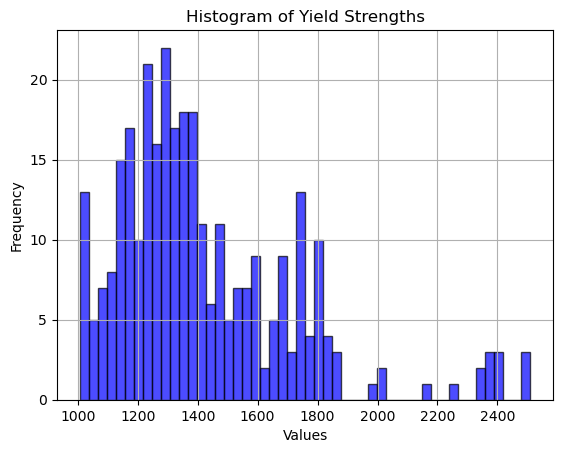

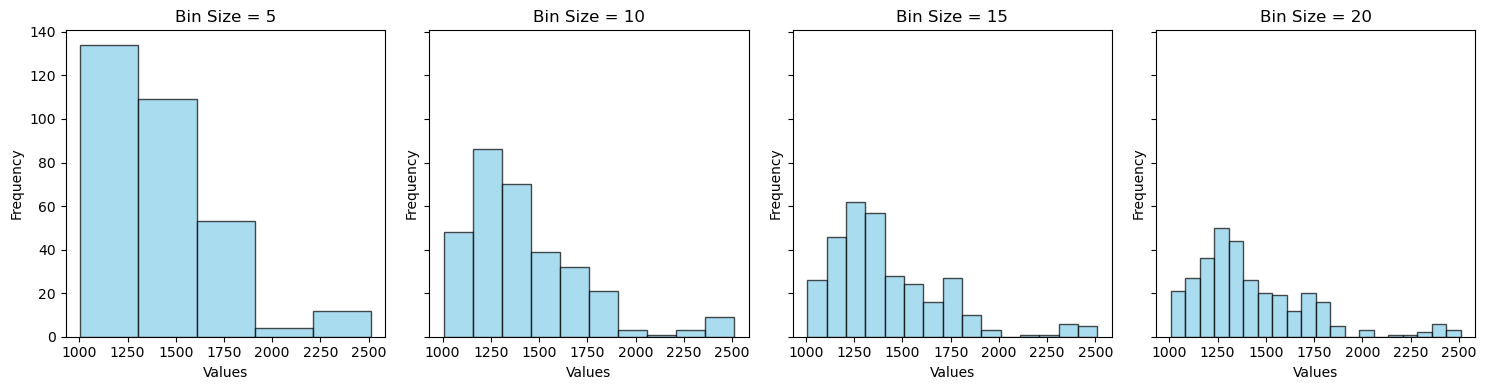

In [150]:


# Plot histogram   how many bins to use?  Lets try a few variations
df['target'].hist(bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Yield Strengths')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Create an array of 4 subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True)

# Plot histograms with different bin sizes
bin_sizes = [5, 10, 15, 20]

for i, bin_size in enumerate(bin_sizes):
    ax = axes[i]
    ax.hist(df['target'], bins=bin_size, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Bin Size = {bin_size}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

axes[0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


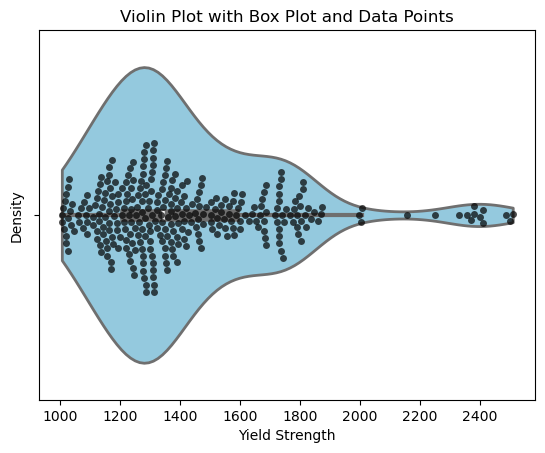

In [151]:
import seaborn as sns

#violin plot 
sns.violinplot(x='target', data=df, color='skyblue', inner='box', cut=0, scale='width', linewidth=2)

# I typically like to view the data points overlaid on the violon plot.
#prefer the swarmplot type
#sns.stripplot(x='target', data=df, color='black', jitter=0.3, size=3, alpha=0.7)
sns.swarmplot(x='target', data=df, color='black', size=5, alpha=0.7)
plt.title('Violin Plot with Box Plot and Data Points')
plt.xlabel('Yield Strength')
plt.ylabel('Density')
plt.show()

I like the violin plots better

b) Featurize the data using the `CBFV` package. Create three featurized versions of the data: one with the `mat2vec` feature set, one with `magpie`, and one with `oliynyk`. 


In [152]:
import pandas as pd
from CBFV import composition

# Initially I hard coded this as shown below.
# This is typically not best practice
# I fed this into ChatGPT3.5 and asked for a good way to do this with a for loop and 
# it provided a loop that I modified slightly

# X_mat2vec, y_mat2vec, formulae_mat2vec, skipped_mat2vec = composition.generate_features(df, elem_prop='mat2vec')
# X_magpie, y_magpie, formulae_magpie, skipped_magpie = composition.generate_features(df, elem_prop='magpie')
# X_oliynyk, y_oliynyk, formulae_oliynyk, skipped_oliynyk = composition.generate_features(df, elem_prop='oliynyk')

# X_sets = [X_mat2vec,X_magpie, X_oliynyk]
# y_sets = [y_mat2vec,y_magpie, y_oliynyk]
# formulae_sets = [formulae_mat2vec,formulae_magpie, formulae_oliynyk]
# skipped_sets = [skipped_mat2vec,skipped_magpie, skipped_oliynyk]

model_names = ['mat2vec', 'magpie', 'oliynyk']

X_sets = []
y_sets = []
formulae_sets = []
skipped_sets = []

for model_name in model_names:
    X, y, formulae, skipped = composition.generate_features(df, elem_prop=model_name)
    X_sets.append(X)
    y_sets.append(y)
    formulae_sets.append(formulae)
    skipped_sets.append(skipped)

# Now X_datasets, y_datasets, formulae_datasets, and skipped_datasets contain the respective datasets
#I can iterate through model_names which will have the same index numbering as the X, y, formulae, and skipped _sets
    

Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 14185.00it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 10065.32it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 20579.39it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 14859.06it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 17335.05it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 12481.38it/s]


	Creating Pandas Objects...


The mat2vec seems to have a potential issue
Above the first Assigning Featuers is 0%?  Is this normal or is there some strange behavior there?

c) Split the dataset into training and testing sets (80% training, 20% testing).



In [153]:
from sklearn.model_selection import train_test_split

X_train_sets=[]
X_test_sets=[]
y_train_sets=[]
y_test_sets=[]

# Split the data into training and testing sets (80% training, 20% testing)
for X,y in zip(X_sets,y_sets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
    X_train_sets.append(X_train)
    X_test_sets.append(X_test)
    y_train_sets.append(y_train)
    y_test_sets.append(y_test)

#Now my X and y that were generated by CBFV composition for each model are split into train and test sets


d) Build linear models and compare the performance of 3 different featurization approaches. 

**don't worry if the results are bad! We will get to better models soon!** 


In [154]:
#this block enumerates through the X and y sets and performs a model fit
#The X and y train sets are used for the fit
#The X_test is enumerated to add the constant field
#The summary is printed for each, but the output is long and truncated so two of the model outputs
#are not shown unless you open the whole lot
#Issue there is using mat2vec generates a lot of parameters making scrolling cumbersome
#additional comparison done in later block

import statsmodels.api as sm
models = []
for X_train,X_test,y_train in zip(X_train_sets,X_test_sets,y_train_sets):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model = sm.OLS(y_train,X_train).fit()
    print(model.summary())
    models.append(model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     54.80
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.86e-18
Time:                        22:20:16   Log-Likelihood:                -1006.9
No. Observations:                 249   AIC:                             2460.
Df Residuals:                      26   BIC:                             3244.
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_0      -7.255e+05   4.44e+05     -1.635      0.1

In [155]:
#This block is to iterate through the models and pull relevant statistical data for how they performed in the training set

import pandas as pd

# Create an empty DataFrame to store model comparison results
model_comparison = pd.DataFrame(columns=["Model", "R-squared", "Adjusted R-squared", "F-statistic", "AIC","BIC"])

# Loop through the models and extract relevant statistics
for model_name, model in zip(model_names,models):
        
    # Extract R-squared
    rsquared = model.rsquared
    
    # Extract adjusted R-squared
    adj_rsquared = model.rsquared_adj
    
    # Extract F-statistic and AIC
    f_statistic = model.fvalue
    aic = model.aic
    bic = model.bic

    # Add the model statistics to the DataFrame
    model_comparison = model_comparison.append({
        "Model": model_name,
        "R-squared": rsquared,
        "Adjusted R-squared": adj_rsquared,
        "F-statistic": f_statistic,
        "AIC": aic,
        "BIC": bic
    }, ignore_index=True)

# Print the model comparison DataFrame
print(model_comparison)


     Model  R-squared  Adjusted R-squared  F-statistic          AIC  \
0  mat2vec   0.997867            0.979659    54.802265  2459.837691   
1   magpie   0.704316            0.649141    12.765030  3321.901334   
2  oliynyk   0.793892            0.730975    12.618042  3270.039740   

           BIC  
0  3244.229687  
1  3462.599450  
2  3477.569461  


In [156]:
#By all metrics, the mat2vec is a better fit.
#However, it has so many features that we may have an over fit


e) For your best model, create a residual plot and a parity plot. 

Look for systematic patterns in your residual


In [157]:
#This code block first generates the y_pred datasets for each featurized X_test set
#Then it pulls relevant metrics comparing mean absolute error, mean squared error,
#root mean squared error, and rsq for the predicted versus actual target values
#for the test set for each featurization method
#
#Then each featurization method can be compared to each other under the same conditions
#
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_sets = []
model_prediction_metrics = pd.DataFrame(columns=["MAE","MSE","RMSE","RSQ"])
# model_comparison = pd.DataFrame(columns=["Model", "R-squared", "Adjusted R-squared", "F-statistic", "AIC","BIC"])

# Predict using the model
#Iterate through each of my models and generate y_pred using that model and that model's
#X_test dataset that was split earlier
for model,X_test in zip(models,X_test_sets):
    #y_pred.append(model.predict(X_test))
    
    y_pred = model.predict(X_test)
    y_pred_sets.append(y_pred)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    rsq = r2_score(y_test, y_pred)

    model_prediction_metrics = model_prediction_metrics.append({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "RSQ": rsq,
        
    },ignore_index=True)

print(model_prediction_metrics)

           MAE           MSE         RMSE         RSQ
0   654.826031  1.827126e+06  1351.712430  -18.288991
1   386.349479  1.950469e+06  1396.591899  -19.591118
2  1595.036039  6.606772e+07  8128.204928 -696.477473


The MAE indicates the magpie model is better while the MSI, RMSE, and RSQ indicate mat2vec is better.
The previous metrics on model fit to the training data also suggests that mat2vec is better

However, because the RSQ is negative in all cases, it is an indication that an ols model produces a poor fit to this data set featurized with these three methods 

In [158]:
#This block is to generate a y_train_pred from the mat2vec featurized data set using the ols model
#purpose is to see side by side the parity plots of the train set versus the test set

y_train_pred = models[0].predict(X_train_sets[0]) 


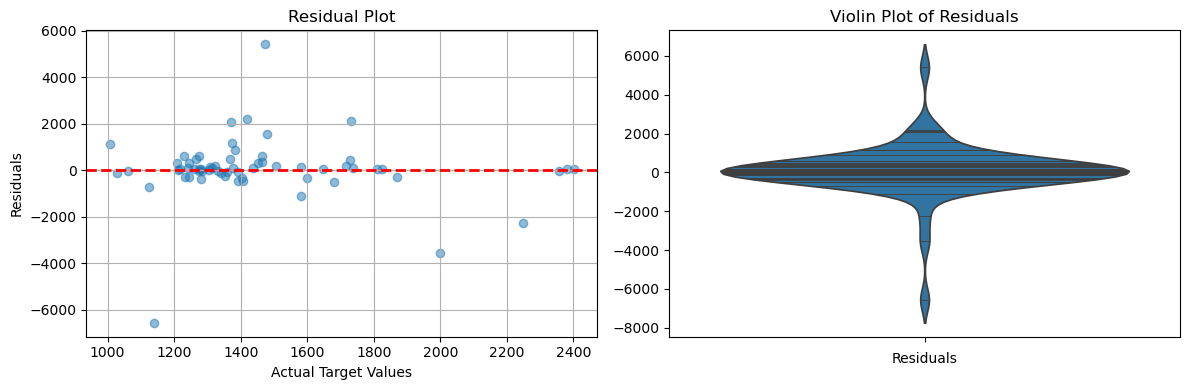

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your best model and the corresponding y_test and y_pred
# best_model = your best trained model
# y_test = actual target values
# y_pred = predicted values from the best model

y_test = y_test_sets[0]
y_pred = y_pred_sets[0]

# Calculate residuals
residuals = y_test - y_pred

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create 1 row, 2 columns of subplots

# Plot 1: Residual scatter plot
axes[0].scatter(y_test, residuals, alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Actual Target Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot")
axes[0].grid(True)

# Plot 2: Violin plot with swarm plot overlay
sns.violinplot(data=residuals, ax=axes[1], inner="stick")
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("")
axes[1].set_title("Violin Plot of Residuals")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


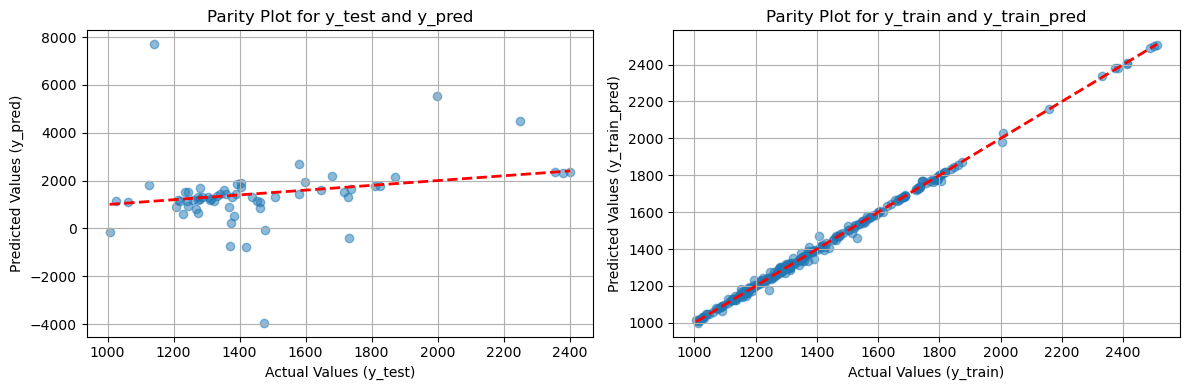

In [160]:
import matplotlib.pyplot as plt

# Assuming you have y_test, y_pred, y_train, and y_train_pred available

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create 1 row, 2 columns of subplots

# Plot 1: Parity plot for y_test and y_pred
axes[0].scatter(y_test, y_pred, alpha=0.5)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Actual Values (y_test)")
axes[0].set_ylabel("Predicted Values (y_pred)")
axes[0].set_title("Parity Plot for y_test and y_pred")
axes[0].grid(True)

# Plot 2: Parity plot for y_train and y_train_pred
axes[1].scatter(y_train, y_train_pred, alpha=0.5)
axes[1].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel("Actual Values (y_train)")
axes[1].set_ylabel("Predicted Values (y_train_pred)")
axes[1].set_title("Parity Plot for y_train and y_train_pred")
axes[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Unsurprisingly the model predicted the training data very well.
I believe the sheer number of features in the mat2vec dataset resulted in overfitting
Filtering out features or fitting with regularzation using a lasso penalty would help eliminate unneeded features


f) Use your best model to predict the yield strength of a new steel composition Fe0.6Ni0.3Co0.2


In [161]:
#First put the formula into a df

df = pd.DataFrame(columns=["formula","target"])
df = df.append({
    "formula":"Fe0.6Ni0.3Co0.2",
    "target":1
},ignore_index=True)
df


,formula,target
0,Fe0.6Ni0.3Co0.2,1


In [162]:
# model_names[0]  #= 'mat2vec'

X, y, formulae, skipped = composition.generate_features(df, elem_prop=model_names[0])

y_pred = models[0].predict(X)

print(y_pred)

Processing Input Data: 100%|██████████| 1/1 [00:00<?, ?it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1/1 [00:00<00:00, 1002.94it/s]


	Creating Pandas Objects...


0   -148592.599215
dtype: float64


g) Now it's time to think about the model you've built and tried using! Discuss why this dataset was appropriate or not for the task given. 

**<span style="color:teal">put your discussion here

I set up a set of arrays for storing the datasets, models, and predictions for each of the three featurization methods

I then pulled out and compared statistical metrics from the model fit between featurization methods
Mat2vec performed better by these metrics

The models were then used to predict on the test set and another analysis was performed comparing metrics on the fit versus the test dataset for each of the featurized dataset.
Mat2vec still performed better, although one of the metrics it was only marginally better


The issue is that the mat2vec featurization generates so many features that it appears to have significantly over fit the data.  Even though it performed better than the others, it was still a very poor model
It did not predict values from the test set well at all.

A possible solution would be to perform some sort of feature filtering
As I explored in the next section, filtering based on p values and then refitting and repeating could help
Or running an L1 penatly regularization with the model fit could help eliminate features to prevent overfitting

</span>**


**3.2 Classification**

Now let's try a classification task! 

a) Download the `matbench_expt_is_metal` dataset, featurize with your choice of feature set, and employ a logistic regression (linear classifier). Report metrics and performance. 

Featurize the data using 'olyinyk'

In [210]:
#Data is loaded, generate the featurized dataset
#From above:
#
#   model_names = ['mat2vec','magpie','olyinyk']
#
from CBFV import composition

X, y, formulae, skipped = composition.generate_features(df, elem_prop=model_names[2])



Processing Input Data: 100%|██████████| 4921/4921 [00:00<00:00, 30373.16it/s]


	Featurizing Compositions...


Assigning Features...:  29%|██▉       | 1443/4921 [00:00<00:00, 14426.06it/s]

Assigning Features...: 100%|██████████| 4921/4921 [00:00<00:00, 10530.12it/s]


	Creating Pandas Objects...


In [211]:

X.shape

(4921, 264)

#Using Olyinyk i was able to get the logisic model to run on the 80/20 split dataset
#however, it hit max iterations


I attempted to implement a 5 fold StratifiedKFold cross-validation to the set and now I am getting
 overflow errors on several of the folds killing my kernel

 Python Machine Learning Expert GPT recommended 5 possible solutions to this:

In [212]:

# # One of those was to Check for High Multicollinearity using this code:

# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pandas as pd

# # Assuming X_train is your training dataset after adding the constant
# # If X_train does not have a constant, add it first:
# X_train_const = sm.add_constant(X_train)

# # Calculate VIF for each feature
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X_train_const.columns
# vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

# print(vif_data)


Split the data 80/20 train/test initially
    -   Would performing this multiple times with different random_states be beneficial?
  

In [213]:
# # Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)


The following lines of code run a stratified K fold cross validation on the data

    -   Running with n_splits = 5 to 7 kernal killing errors are thrown
    -   Running with 3 or 4 results in convergence errors for all folds
-   
Will run with 4 and max iterations = 1000
    This resulted in a kernel killing error 
    Same when maxiter=500



In [214]:
#
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Assuming X and y are already defined
from sklearn.model_selection import train_test_split


# Initialize StratifiedKFold
n_splits = 4  # Define the number of folds
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Prepare an array to store results for each fold
results = []

for train_idx, val_idx in cv.split(X_train, y_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Add a constant to the features for the intercept term
    X_train_fold_const = sm.add_constant(X_train_fold)
    X_val_fold_const = sm.add_constant(X_val_fold)
    
    # Fit the model
    model = sm.Logit(y_train_fold, X_train_fold_const).fit(disp=0)  # disp=0 suppresses the fit output
    
    # Evaluate the model (e.g., using accuracy, AUC, or another metric on the validation set)
    # Here, we use the model's log-likelihood as an example metric
    log_likelihood = model.llf
    results.append(log_likelihood)

    # You can also make predictions on the validation set and evaluate them
    # predictions = model.predict(X_val_fold_const)
    # Evaluate predictions...

# Average the results from all folds for an overall metric
average_log_likelihood = np.mean(results)
print(f"Average Log-Likelihood: {average_log_likelihood}")


c:\Users\byron\miniconda3\envs\HW1_Q3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\byron\miniconda3\envs\HW1_Q3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\byron\miniconda3\envs\HW1_Q3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Average Log-Likelihood: -699.9645533991913


c:\Users\byron\miniconda3\envs\HW1_Q3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


I believe the magnitude of the average log-likelihood is a bad thing, but I'm not fully understanding this term.
I would look into it more, but for this model fit I am running into convergence warnings where we have not reached the final value with the default 100 iterations.
Oddly, increasing the number of iterations leads to kernal crashes indicating that the model is not converging leading to overflow errors

Discovered the default is not 100.  The summary showed 35 iterations
Changed maxiter=35 and it passes
Going much higher and kernel errors occur

Tried both ways of running the fit using statsmodels.formula.api and statsmodels.api
statsmodel.api is better suited to these datasets
Particularly using olyinyk which has features with not-allowed characters for the formula.api
You could parse through and replace/remove those characters, but the statsmodel.api method doesn't have that restriction

In [215]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split  # Import train_test_split from scikit-learn


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.Logit(y_train,X_train).fit(disp=0, maxiter=35)
print(model.summary())


                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 3936
Model:                          Logit   Df Residuals:                     3727
Method:                           MLE   Df Model:                          208
Date:                Fri, 02 Feb 2024   Pseudo R-squ.:                  0.6407
Time:                        22:35:29   Log-Likelihood:                -980.24
converged:                      False   LL-Null:                       -2728.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.1942        nan        nan        nan         nan         nan
avg_Atomic_Number            

c:\Users\byron\miniconda3\envs\HW1_Q3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The code below is to implement regularization using the L1 method
It takes a while so I am commenting it out and refining the rest of the notebook with a standard logit fit


In [216]:
# # #When I advised chatGpt 4 that i now get the overflow error again it recommended regularization
# # #Here is the code provided:
# #This was initially run using the olyinyk featurization but it still went over iteration limits
# #However, because the l1 regularization serves to force many of the parameters to zero
# #thereby removing many less relevant features I thought it may be interesting to apply 
# #to the mat2vec featurization which produces a very large number of parameters

# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Add a constant to the scaled features
# X_train_scaled = sm.add_constant(X_train_scaled)
# X_test_scaled = sm.add_constant(X_test_scaled)

# # Fit the logistic regression model with L1 regularization
# model = sm.Logit(y_train, X_train_scaled).fit_regularized(method='l1')
# print(model.summary())


Many nan p values
Filter those out

In [217]:
import statsmodels.api as sm

# Get the model's summary as a pandas DataFrame
results_summary = model.summary2().tables[1]

# Filter out rows where any of the 'Coef.', 'Std.Err.', or 'P>|z|' columns are nan
filtered_results = results_summary.dropna(subset=['Coef.', 'Std.Err.', 'P>|z|'])

# Extract the names of the significant features (excluding 'const')
significant_features = filtered_results.index.tolist()
if 'const' in significant_features:
    significant_features.remove('const')

# Filter the original X_train and X_test DataFrames to keep only the significant features
X_train_filtered = X_train[significant_features]
X_test_filtered = X_test[significant_features]


Refit the model with the filtered sets

In [218]:
model = sm.Logit(y_train,X_train_filtered).fit(disp=0)
# print(model.summary())

c:\Users\byron\miniconda3\envs\HW1_Q3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Many high p values, filter out >=0.05

In [219]:
import statsmodels.api as sm
import pandas as pd

# Fit the initial model (if not already done)
# model = sm.Logit(y_train, X_train).fit()

# Get the p-values for the model's coefficients
p_values = model.pvalues

# Filter the features with p < 0.05, excluding the constant
significant_features = p_values[p_values < 0.05].index.drop('const', errors='ignore')

if 'const' in significant_features:
    significant_features.remove('const')

# Filter the original X_train and X_test DataFrames to keep only the significant features
X_train_filtered = X_train[significant_features]
X_test_filtered = X_test[significant_features]


Fit the model again

These notebooks provide an interesting way to interact with the code 

I went back and forth to run the filter and model fit a total of 3 times.


In [220]:

model = sm.Logit(y_train,X_train_filtered).fit(disp=0)
print(model.summary())


                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 3936
Model:                          Logit   Df Residuals:                     3911
Method:                           MLE   Df Model:                           24
Date:                Fri, 02 Feb 2024   Pseudo R-squ.:                  0.5097
Time:                        22:35:30   Log-Likelihood:                -1337.5
converged:                       True   LL-Null:                       -2728.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
avg_Metalliod                                  -2.4820      0.634     -3.917      0.000      -3.724      -1.240
avg_crystal_radius              

Want to determine the coefficients with the largest effect on the target

In [221]:
# Retrieve the model's coefficients
coefficients = model.params

# Create a DataFrame from the coefficients
coef_df = pd.DataFrame({'Feature': X_train_filtered.columns, 'Coefficient': coefficients})

# Take the absolute value of the coefficients to consider overall impact
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

# Sort the DataFrame by the absolute value of the coefficients in descending order
sorted_coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Display the sorted DataFrame to see the features with the largest coefficients
# print(sorted_coef_df)

# If you want just the list of column names sorted by their impact
sorted_features = sorted_coef_df['Feature'].tolist()
# print(sorted_features)


Perform prediction and get additional metrics from them

In [222]:
# Get the top features 

top_features = sorted_coef_df['Feature'].head(3)
# top_features = ['avg_ionic_radius','min_Covalent_Radius','avg_Atomic_Radius']
top_features

mode_Covalent_Radius    mode_Covalent_Radius
mode_Atomic_Radius        mode_Atomic_Radius
dev_l_quantum_number    dev_l_quantum_number
Name: Feature, dtype: object

I liked one of the plots from the LogisticRegression worked example, but I need to isolate the feature by selecting the feature with the largest coefficient.


In [223]:
import statsmodels.api as sm

# Assuming X_train_filtered and y_train are already defined and
# X_train_filtered includes a constant for the intercept.
# If not, add it using sm.add_constant(X_train_filtered)

# Get the confidence interval for all coefficients
print("Confidence Intervals:\n", conf_int)

# Extract the confidence interval for 'feature_1'
conf_int = model.conf_int()
conf_int_feature = conf_int.loc[feature]
print("Confidence Interval for ",feature, "  :", conf_int_feature)

# If you need them separately
# conf_int_min, conf_int_max = conf_int_feature
# print(f"Min: {conf_int_min}, Max: {conf_int_max}")


Confidence Intervals:
                                                      0         1
avg_Metalliod                                -3.723931 -1.239999
avg_crystal_radius                            1.499006  2.725887
avg_valence_f                                 0.040819  0.214514
avg_Number_of_unfilled_p_valence_electrons    0.636007  1.389419
dev_Metal                                    -3.777599 -1.548465
dev_Metalliod                                -0.088303  2.373046
dev_l_quantum_number                          3.181386  4.559213
dev_Gordy_electonegativity                    0.670874  1.229031
dev_metallic_valence                          0.788994  1.349912
dev_gilmor_number_of_valence_electron        -2.389955 -1.616227
dev_Density_(g/mL)                           -0.303868 -0.112879
dev_Cohesive_energy                           0.427108  0.870938
range_Atomic_Radius                          -0.431481  1.213519
range_gilmor_number_of_valence_electron      -0.288874  0.142629
ma

The code below was intended to generate an array of plots similar to the one found in the LogisticRegression worked example
I am having trouble getting the confidence intervals to plot properly
I believe it is just an indexing issue with using dataframes vs numpy (arrays?)
I may not fix this code, but will work on fixing the code below it that I broke when I did some additional model refinement above

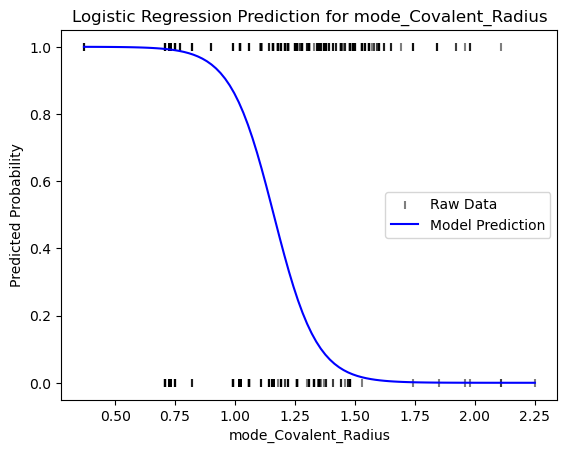

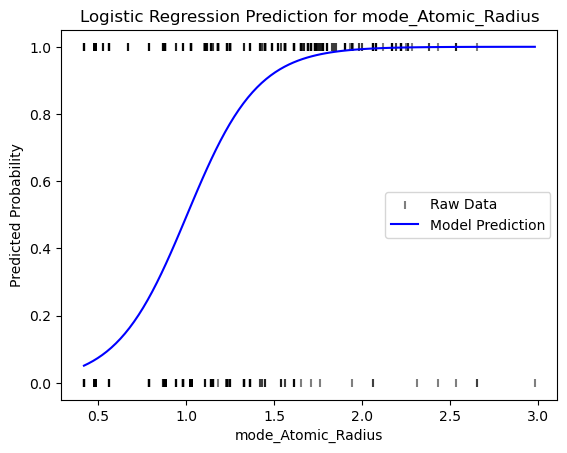

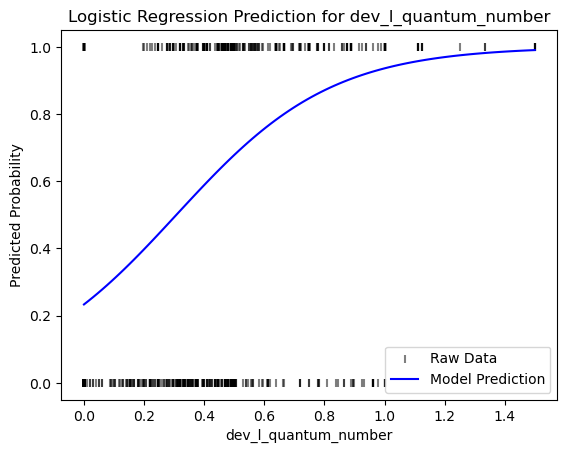

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the top features you want to analyze
top_features = ['mode_Covalent_Radius','mode_Atomic_Radius','dev_l_quantum_number']

# Iterate over the top features
for feature in top_features:
    # Create a range of values for the feature

    # perform the prediction on the test set and get information about them
    predictions = model.get_prediction(X_test_filtered)
    preds = predictions.predicted # get predicted values
    conf_ints= predictions.conf_int() # get confidence intervals
    
    
    feature_range = np.linspace(X_test_filtered[feature].min(), X_test_filtered[feature].max(), 100)
    
    # Create a DataFrame where this feature varies but all others are held at their mean value
    X_feature_range = pd.DataFrame(data=np.repeat(X_test_filtered.mean().values[None, :], len(feature_range), axis=0),
                                   columns=X_test_filtered.columns)
    
    # Replace the values in the feature column with the varying feature_range values
    X_feature_range[feature] = feature_range
    
    # Add a constant to the DataFrame for the intercept if your model requires it
    X_feature_range_const = sm.add_constant(X_feature_range)
    
    # Get predictions from the model
    predictions = model.predict(X_feature_range_const)
    
    # Plot the actual data points
    plt.scatter(
        X_test_filtered[feature], 
        y_test, 
        color='black', 
        marker='|',
        label='Raw Data', 
        alpha=0.5)
    


    # Plot the predictions as a line
    plt.plot(feature_range, predictions, color='blue', label='Model Prediction')
    
    # plt.fill_between(feature_range, ci_lower, ci_upper, color='blue', alpha=0.2, label='95% Confidence Interval')
    # plt.fill_between(feature_range, conf_ints[:,0], conf_ints[:,1], alpha=0.3, label="95% Conf. Int.")
    # Customize the plot
    plt.xlabel(feature)
    plt.ylabel('Predicted Probability')
    plt.title(f'Logistic Regression Prediction for {feature}')
    plt.legend()
    plt.show()


I think the plots above are much better than what I was doing below
Very difficult to tell anything from the plots below, but the plots above are informative

It is clear that this is a poor fit, but it looks like the dev_1_quantum_number had the best predictions compared to the other three I looked at.

The features were filtered by removing nan p values and then all p-values >= 0.05 leaving only those that seemed to be most relevant

These were then filtered to look more closely at those features that had the highest coefficients and therefore have the largest effect on the predicted target values.

None of those three features seemed to fit the data well with the logisic model.



I had trouble running the fit using mat2vec or magpie where I kept getting overflow errors.
When I ran the standard model on the olyinyk featurized data it didn't throw an error but I got a convergence warning that I was exceeding the max number of iterations.
This was onlhy 35 iterations though.
Increasing the number of iterations lead to more overflow errors which are very inconvenient because the kill my kernel making me restart and rerun everything.  This could be a problem if I had to reload large datasets from the materials project database.

Through trial and error it seemed that I was starting to get overflow errors when i explicitly dictated maxiter=37
(I tried 1000 first, then 100, then 50, and so on)

This behavior makes sense if the model is not converging.  If it is diverging it could lead to overflow errors after a certain point
This hypothesis is supported by the fact that I am getting convergence warnings


cross validation also proved challenging
I chose a stratified K fold cross validation due to the true/false nature of the data
I chose nsplits=5 initially but it threw another kernel killer

after some more trial and error I determined that nsplits of 3 or 4 completes (still getting convergence warnings)
However, nsplits of 5, 6, or 7 all threw kernel errors
I don't believe splitting less than 3 is productive
I went with a split of 4, but because of the convergence warnings it is difficult to put much stock into the value of the avg log likelihood.
    In fact I don't really know much about that metric
    I believe the magnitude of 700 is pretty high which is bad, but I decided not to spend time on this assignment chasing the meaning of that value because it is clear that this model is bad for this data (at least with this featurization)


I also tried regularization using the L1 penalty to try to weed out unnecessary features (particularly for mat2vec)
After ~350 minutes the mat2vec featurized data completed its run.
It did not throw overflow errors which was an improvement, but it did not converge.

In hindsight I probably should have saved that output as it was lost to the jupyter notebook interface
Particularly since that took so long to run I should have saved it

I also implemented the L1 penalty with the olyinik featurized set and it still had the convergence issues
Because the regularization significantly increased the time to run I included that code so I can run it, but tuned the rest of the notebook without the regularization.

After the model was fit, I removed all features with nan p values
I then refit the model and removed all features with p values >= 0.5
After refitting the model again, at least one feature had a  p value above the threshold so I ran the refit, filter two more times giving me a final X_train_filtered and X_test_filtered with a limited feature set


The model fit still failed to converge properly.

In the midst of this I produced the code blocks below which explored the fit somewhat, but were hard to make sense of.



In the plots above I had difficulty getting the CIs to shade, I feel that it would have been informative.
However, the end result is the same that the conclusion seems to be that this is not the proper model for this dataset.







In [225]:
residuals = y_test - preds

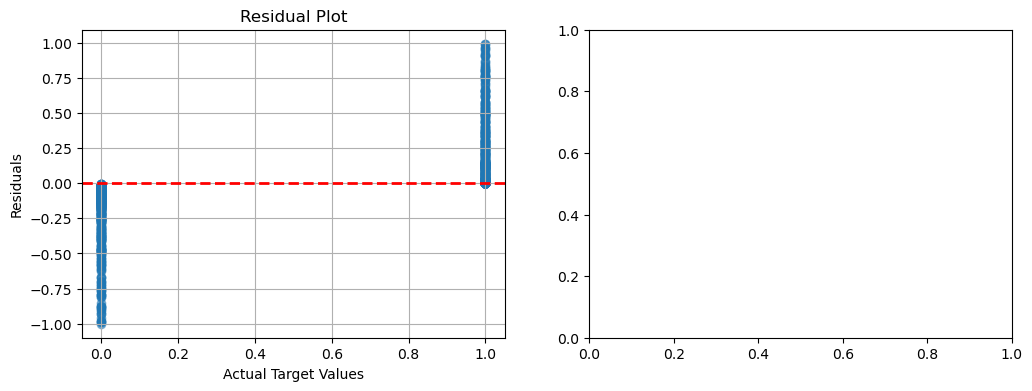

In [226]:

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create 1 row, 2 columns of subplots

# Plot 1: Residual scatter plot
axes[0].scatter(y_test, residuals, alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2) #this line is not useful
axes[0].set_xlabel("Actual Target Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot")
axes[0].grid(True)

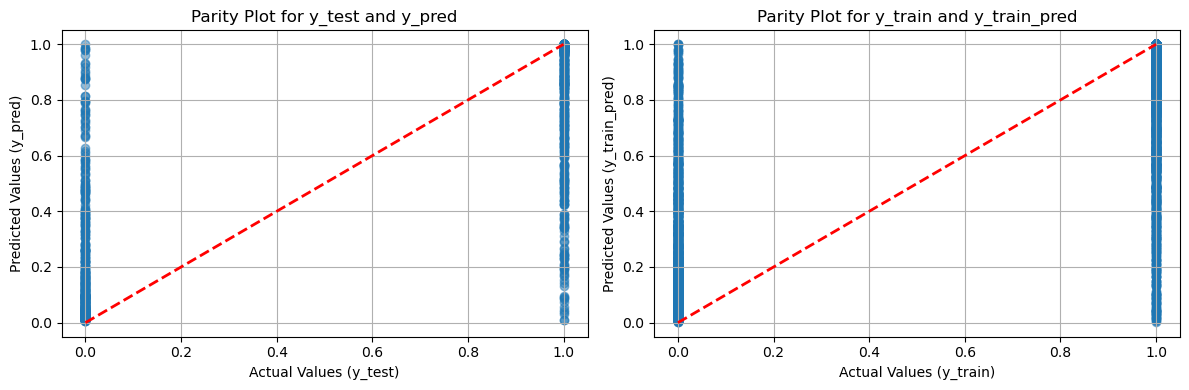

In [227]:
import matplotlib.pyplot as plt
y_train_pred = model.predict(X_train_filtered)
# Assuming you have y_test, y_pred, y_train, and y_train_pred available

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create 1 row, 2 columns of subplots

# Plot 1: Parity plot for y_test and y_pred
axes[0].scatter(y_test, preds, alpha=0.5)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Actual Values (y_test)")
axes[0].set_ylabel("Predicted Values (y_pred)")
axes[0].set_title("Parity Plot for y_test and y_pred")
axes[0].grid(True)

# Plot 2: Parity plot for y_train and y_train_pred
axes[1].scatter(y_train, y_train_pred, alpha=0.5)
axes[1].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel("Actual Values (y_train)")
axes[1].set_ylabel("Predicted Values (y_train_pred)")
axes[1].set_title("Parity Plot for y_train and y_train_pred")
axes[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
